# apply

In [52]:
matrix.data <- matrix(1:9, nrow = 3)
matrix.data

1,4,7
2,5,8
3,6,9


In [53]:
apply(matrix.data, 1, sum)

[1] 12 15 18

In [55]:
rowSums(matrix.data)

[1] 12 15 18

In [54]:
apply(matrix.data, 2, sum)

[1]  6 15 24

In [56]:
colSums(matrix.data)

[1]  6 15 24

In [58]:
apply(matrix.data, 1, sum, na.rm=TRUE)

[1] 12 15 18

In [59]:
matrix.data <- matrix(1:9, nrow = 3)
matrix.data[2,1] <- NA
matrix.data

1,4,7
NA,5,8
3,6,9


In [60]:
rowSums(matrix.data)

[1] 12 NA 18

In [61]:
rowSums(matrix.data, na.rm=TRUE)

[1] 12 13 18

# lappy
> * list의 각 원소에 함수를 적용
> * list로 그 결과 리턴

In [14]:
X <- list(1:3, 4:6, 7:9)
X
str(X)

[[1]]
[1] 1 2 3

[[2]]
[1] 4 5 6

[[3]]
[1] 7 8 9

List of 3
 $ : int [1:3] 1 2 3
 $ : int [1:3] 4 5 6
 $ : int [1:3] 7 8 9


In [15]:
lapply(X, mean)

[[1]]
[1] 2

[[2]]
[1] 5

[[3]]
[1] 8

# sapply
> * vector로 리턴

In [62]:
sapply(X, mean)

[1] 2 5 8

# mapply
> * 여러 list의 각 원소에 대해 함수를 적용

In [65]:
list01 <- list(A=matrix(1:16, 4), B=matrix(1:16, 2), C = 1:5)
list02 <- list(A=matrix(1:16, 4), B=matrix(1:16,8), c=6:16)

mapply(identical, list01, list02)

A     B     C 
 TRUE FALSE FALSE

# do.call

In [16]:
do.call(rbind, X)

1,2,3
4,5,6
7,8,9


In [20]:
data <- list()
N <- 100000

for (n in 1:N) {
    data[[n]] <- data.frame(index = n,
                           char=sample(letters, 1),
                           Z = runif(1))
}

data[[1]]

index,char,Z
1,n,0.6832947


In [29]:
mean.function <- function(x, func=mean){
    do.call(func, args=list(x))
}

mean.function(c(1:10))

[1] 5.5

# 제어문
* ==, <, <=, >, >=, !=
* as.numeric, as.facotr, as.character

In [33]:
example_par <- 1

if (example_par == 1){
    print("hello")
}

[1] "hello"


In [36]:
if (example_par == 0){
    print("hello")
}

In [37]:
check_par <- function(x){
    if(x==1){
        print("Hello")
    } else {
        print("no thanks")
    }
}

In [38]:
check_par(1)

[1] "Hello"


In [39]:
check_par(0)

[1] "no thanks"


In [41]:
check_par(TRUE)

[1] "Hello"


In [42]:
ifelse(1 == 1, "Google", "Facebook")

[1] "Google"

In [43]:
ifelse(1 == 0, "Google", "Facebook")

[1] "Facebook"

In [45]:
test_vector <- c(1, 1, 0, 1, 0, 1)
ifelse(test_vector == 1, "Yes", "No")

[1] "Yes" "Yes" "No"  "Yes" "No"  "Yes"

# loop

## for

In [46]:
for (i in 1:10){
    print(i)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


## while

In [47]:
x <- 1
while (x <=5){
    print(x)
    x <- x+1
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5


In [48]:
for (i in 1:10){
    if(i == 3){
        next
    }
    print(i)
}

[1] 1
[1] 2
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


In [49]:
for (i in 1:10){
    if (i == 4){
        break
    }
    print(i)
}

[1] 1
[1] 2
[1] 3


# group by

In [69]:
library(ggplot2)

data(diamonds)
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [72]:
aggregate(price ~ cut, diamonds, mean, na.rm=TRUE)

cut,price
Fair,4358.758
Good,3928.864
Very Good,3981.760
Premium,4584.258
Ideal,3457.542


In [76]:
table(diamonds$color)


    D     E     F     G     H     I     J 
 6775  9797  9542 11292  8304  5422  2808 

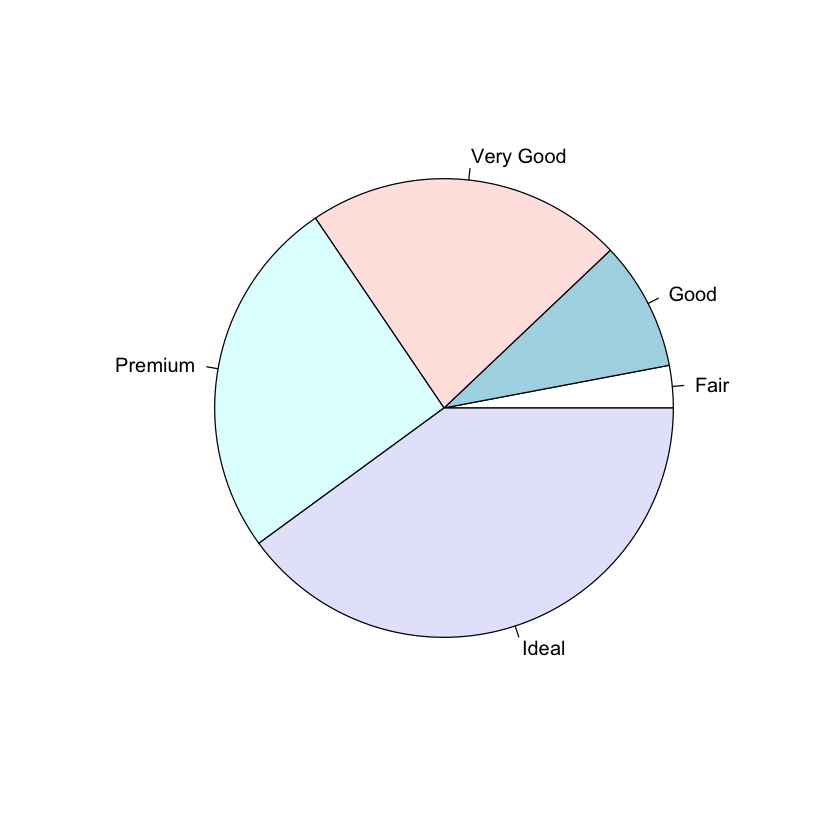

In [78]:
pie(table(diamonds$cut))

In [82]:
library(data.table)

diamondsDT <- data.table(diamonds)
head(diamondsDT)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [84]:
tables()

         NAME   NROW NCOL MB                                    COLS KEY
1: diamondsDT 53,940   10  3 carat,cut,color,clarity,depth,table,...    
Total: 3MB


In [87]:
setkey(diamondsDT, cut)
tables()
key(diamondsDT)

         NAME   NROW NCOL MB                                    COLS KEY
1: diamondsDT 53,940   10  3 carat,cut,color,clarity,depth,table,... cut
Total: 3MB


[1] "cut"

In [93]:
diamondsDT[, list(price=mean(price), carat =mean(carat)), 
           by=list(cut, color)]

cut,color,price,carat
Fair,E,3682.312,0.8566071
Fair,F,3827.003,0.9047115
Fair,H,5135.683,1.2191749
Fair,G,4239.255,1.0238217
Fair,J,4975.655,1.3411765
Fair,I,4685.446,1.1980571
Fair,D,4291.061,0.9201227
Good,E,3423.644,0.7451340
Good,J,4574.173,1.0995440
Good,I,5078.533,1.0572222
